In [1]:
# Import library yang diperlukan
import pandas as pd
import plotnine as p9

In [2]:
# Mengimport data
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/datakependudukandki-dqlab.csv")
data

,TAHUN,NAMA PROVINSI,NAMA KABUPATEN/KOTA,NAMA KECAMATAN,NAMA KELURAHAN,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),JENIS KELAMIN,RENTANG UMUR,JUMLAH
0,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Laki-laki,35-39,5316
1,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Perempuan,35-39,3221
2,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Laki-laki,40-44,3137
3,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Perempuan,40-44,6358
4,2013,PROVINSI DKI JAKARTA,JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,4.26,16409,Laki-laki,45-49,3675
...,...,...,...,...,...,...,...,...,...,...
4801,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,Perempuan,65-69,33
4802,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,Laki-laki,70-74,33
4803,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,Perempuan,70-74,20
4804,2013,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.91,6779,Laki-laki,>75,13


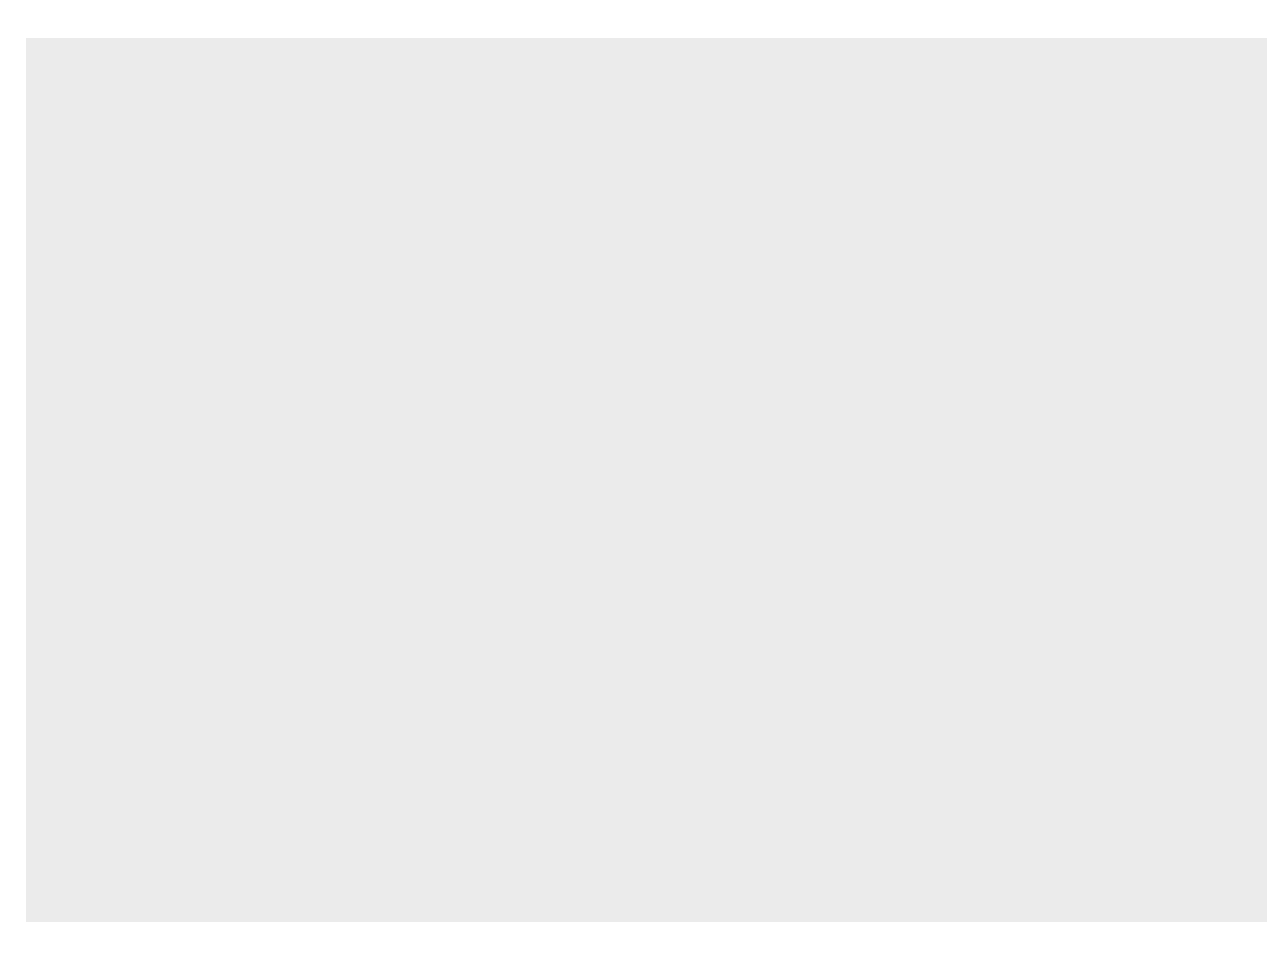

In [3]:
# Menggunakan fungsi ggplot
from plotnine import *
ggplot(data=data).draw()

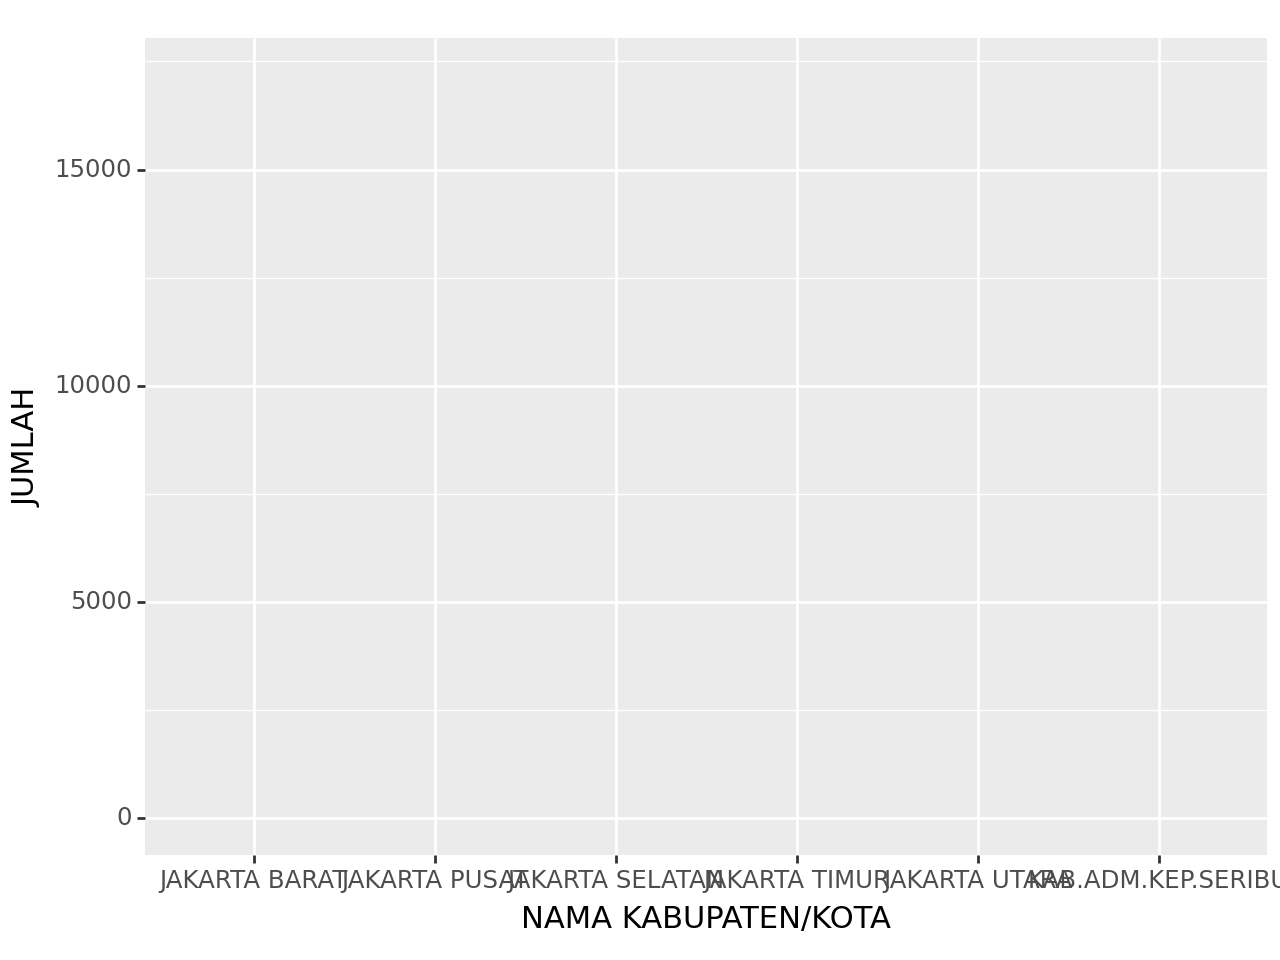

In [4]:
# Menambahkan fungsi aes()
(ggplot(data=data) + aes(x="NAMA KABUPATEN/KOTA",y="JUMLAH")).draw()

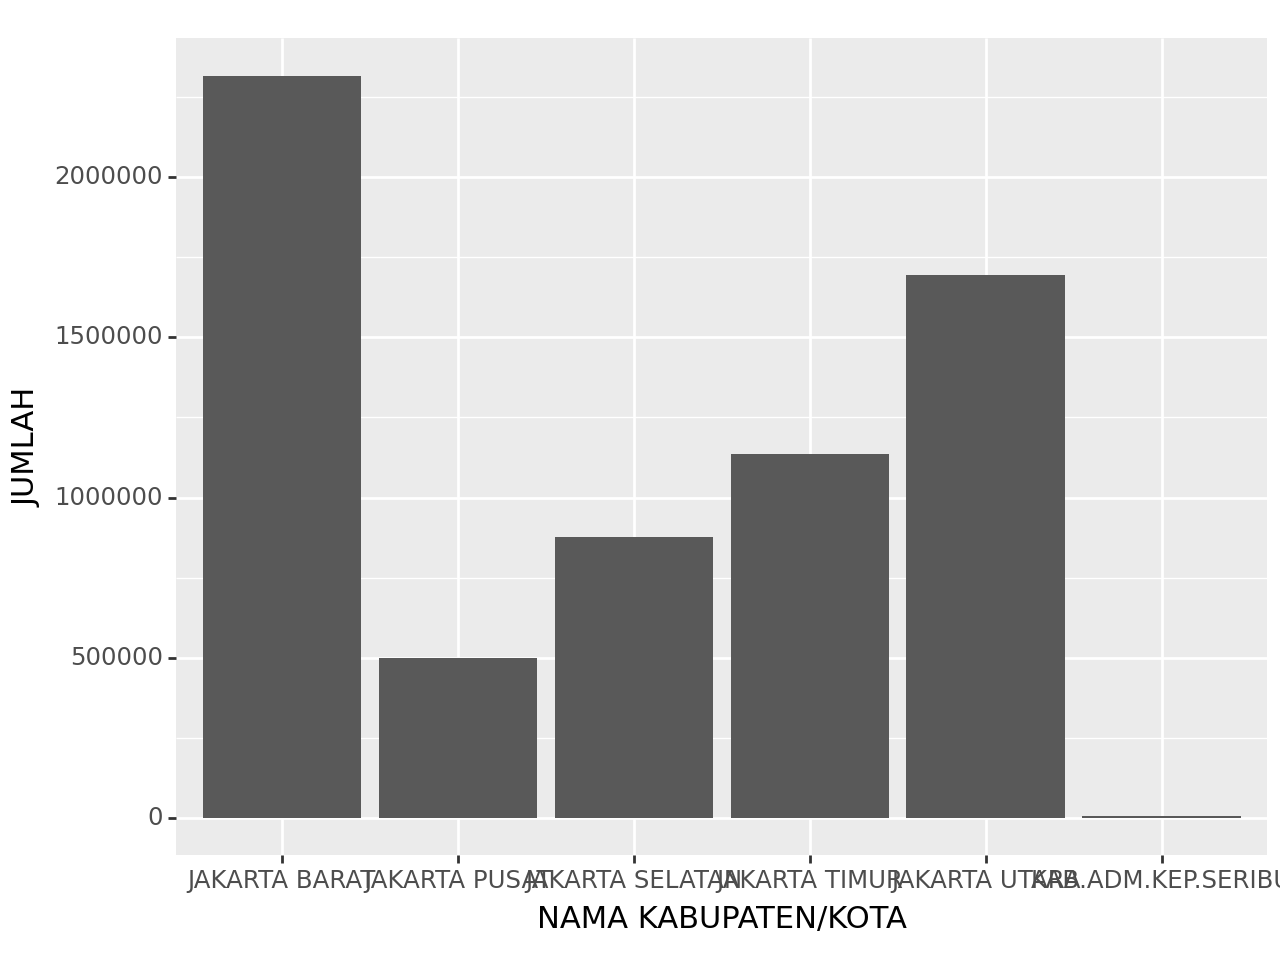

In [5]:
# Menambahkan Geometrics
(ggplot(data=data)+aes(x="NAMA KABUPATEN/KOTA",y="JUMLAH")+geom_col()).draw()

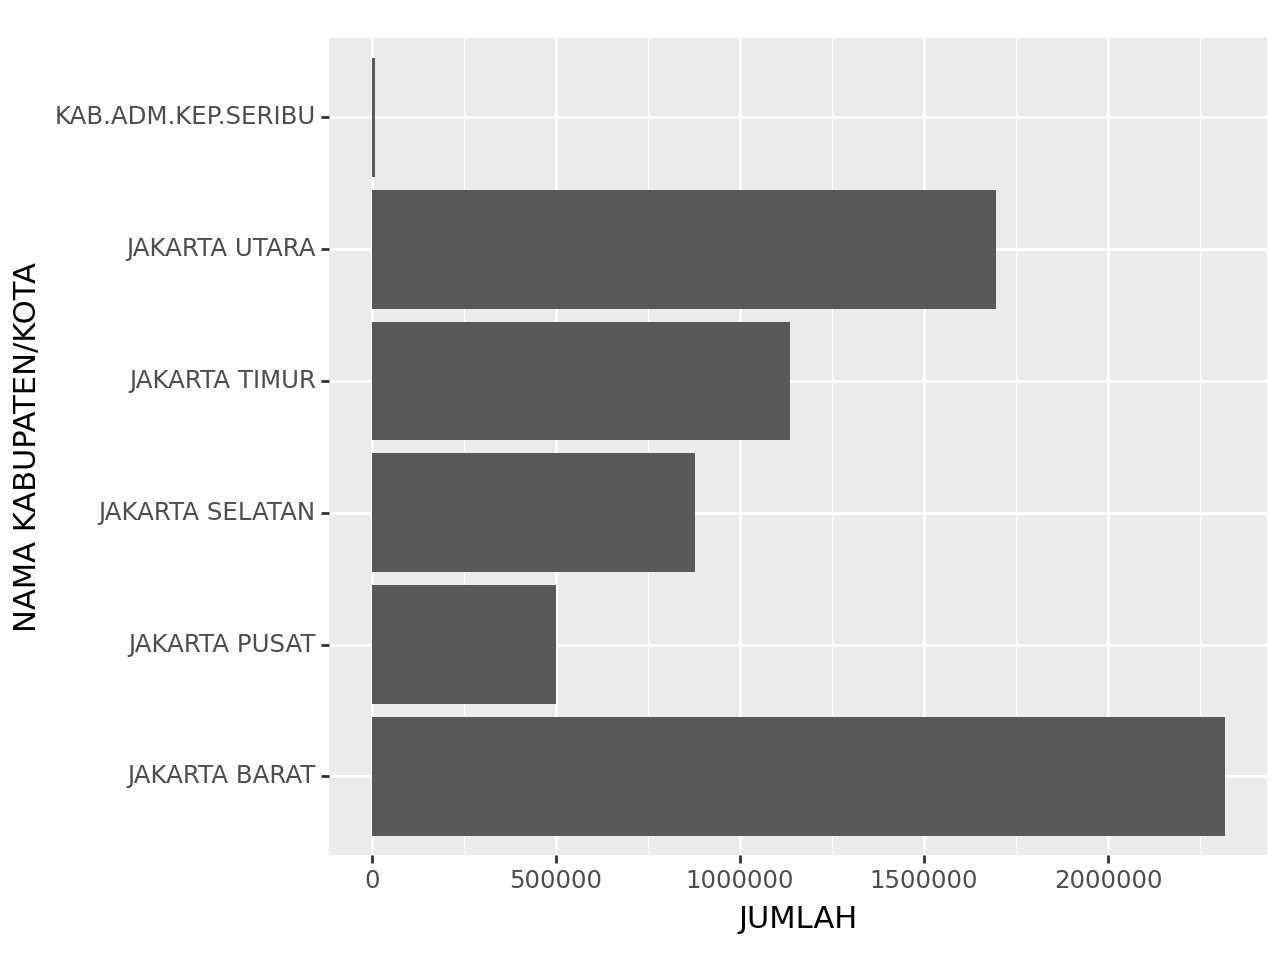

In [6]:
# Membuat diagram batang horizontal
(ggplot(data=data)+
 aes(x="NAMA KABUPATEN/KOTA",y="JUMLAH")+
 geom_col()+
coord_flip()).draw()

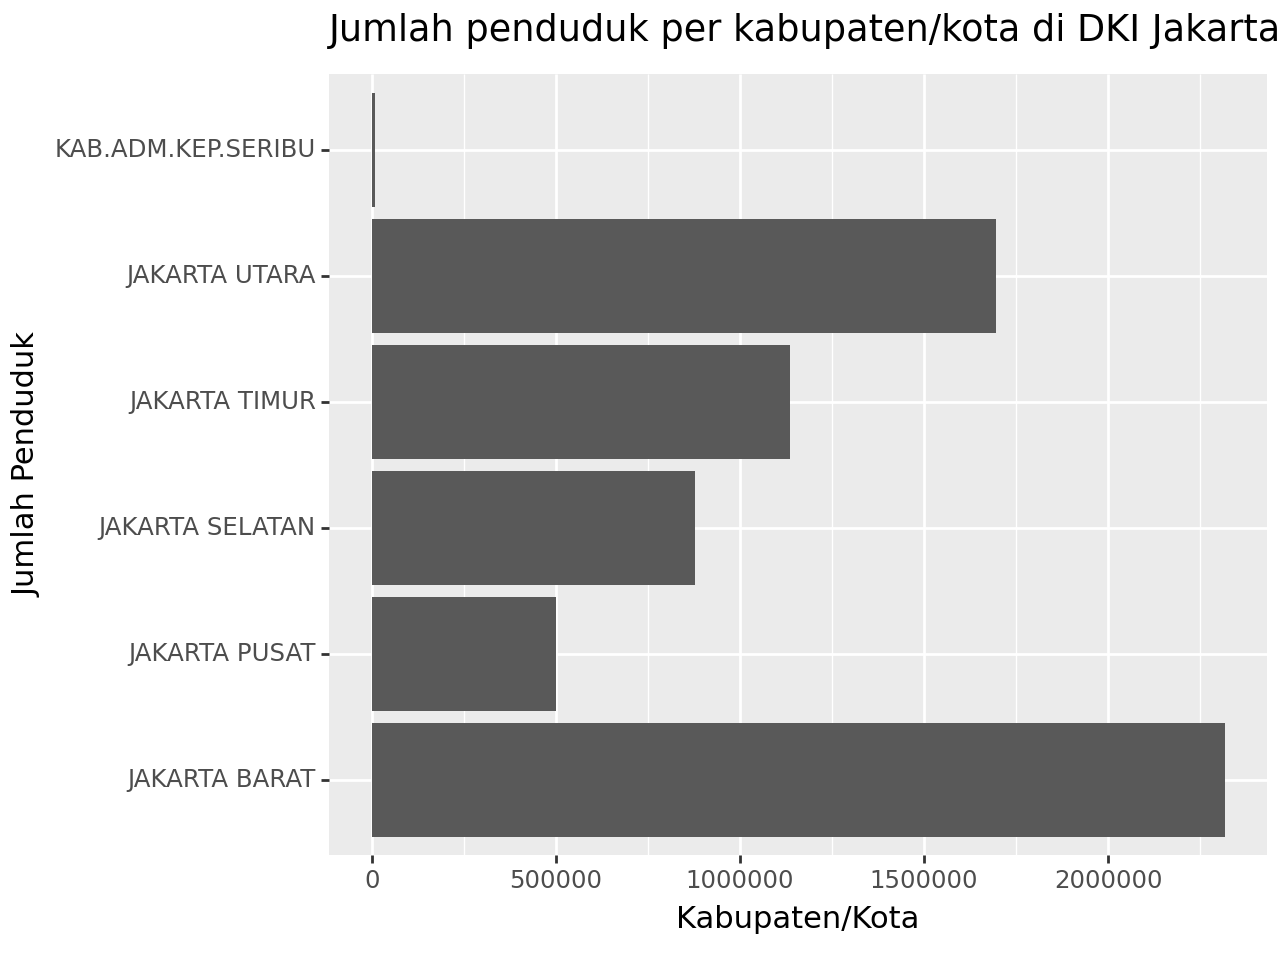

In [7]:
# Menambahkan judul dan mengubah x dan y label
(ggplot(data=data)+
 aes(x="NAMA KABUPATEN/KOTA",y="JUMLAH")+
 geom_col()+
coord_flip()+
labs(title="Jumlah penduduk per kabupaten/kota di DKI Jakarta (2013)",x="Jumlah Penduduk",y="Kabupaten/Kota")).draw()

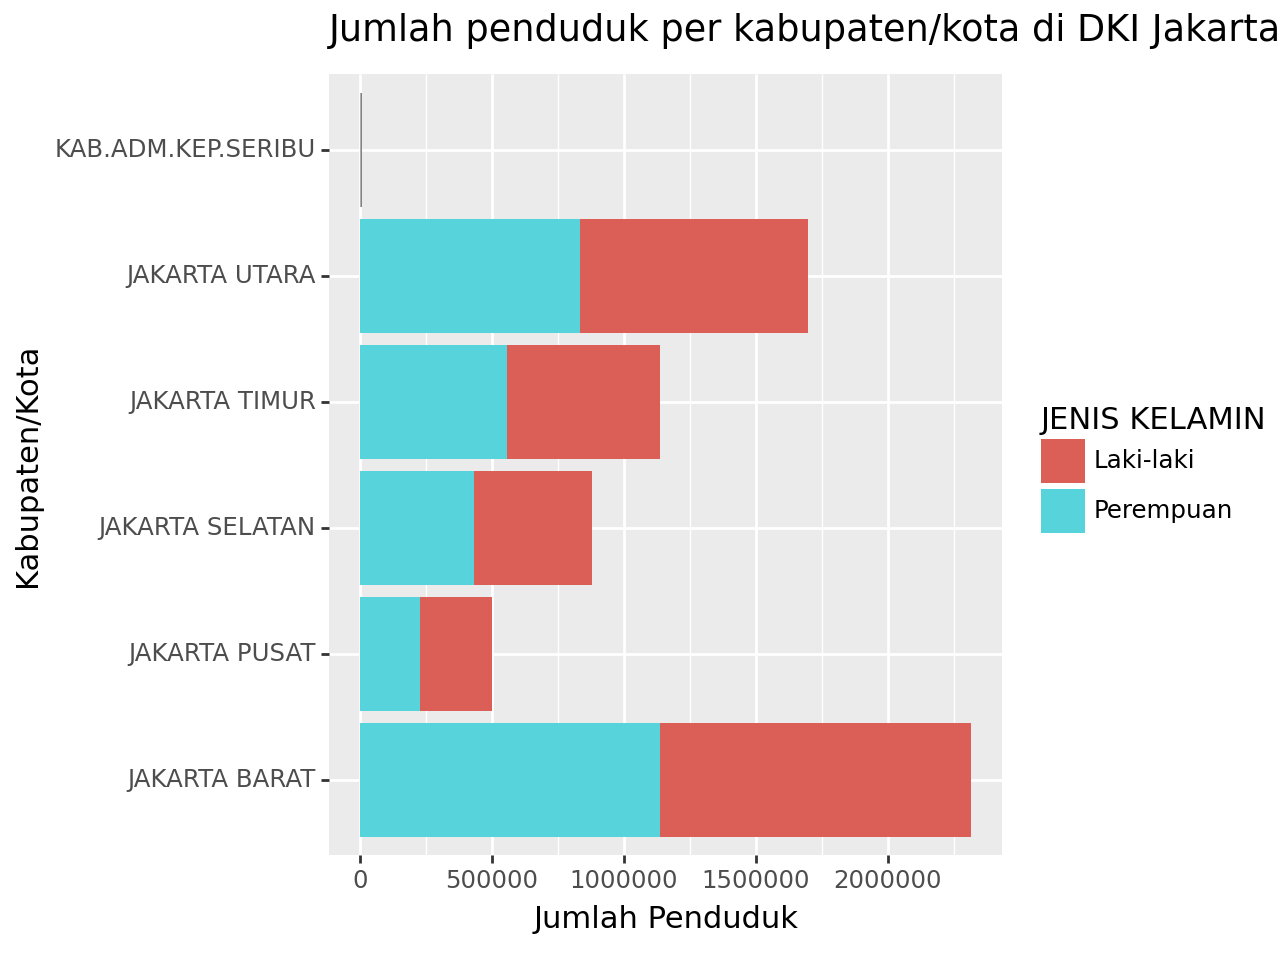

In [8]:
# Menambahkan judul dan mengubah x dan y label
(ggplot(data=data)+
 aes(x="NAMA KABUPATEN/KOTA",y="JUMLAH",fill="JENIS KELAMIN")+
 geom_col()+
coord_flip()+
labs(title="Jumlah penduduk per kabupaten/kota di DKI Jakarta (2013)",y="Jumlah Penduduk",x="Kabupaten/Kota")).draw()

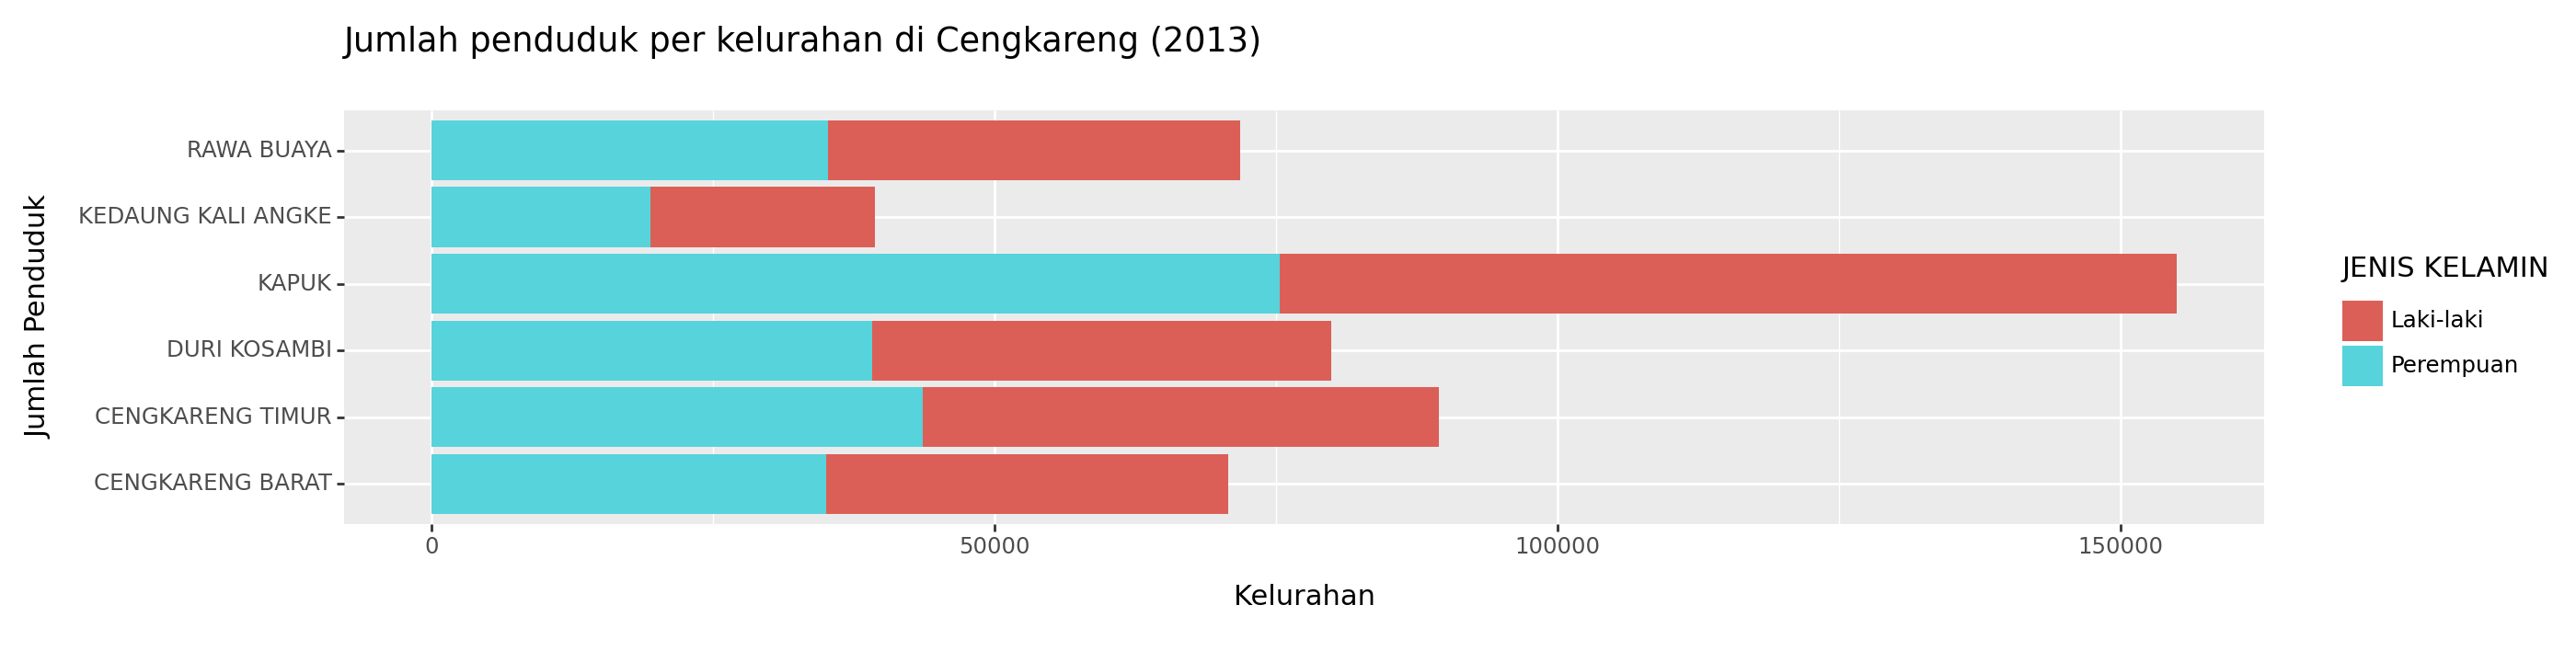

In [26]:
# Membuat visualisasi dengan variabel berbeda
import plotnine
plotnine.options.figure_size=(14, 3.6)
(ggplot(data=data[data["NAMA KECAMATAN"]=="CENGKARENG"]) +
       aes(x="NAMA KELURAHAN",y="JUMLAH",fill="JENIS KELAMIN")+
       geom_col()+
       coord_flip()+
       labs(title="Jumlah penduduk per kelurahan di Cengkareng (2013)",x="Jumlah Penduduk",y="Kelurahan")).draw()

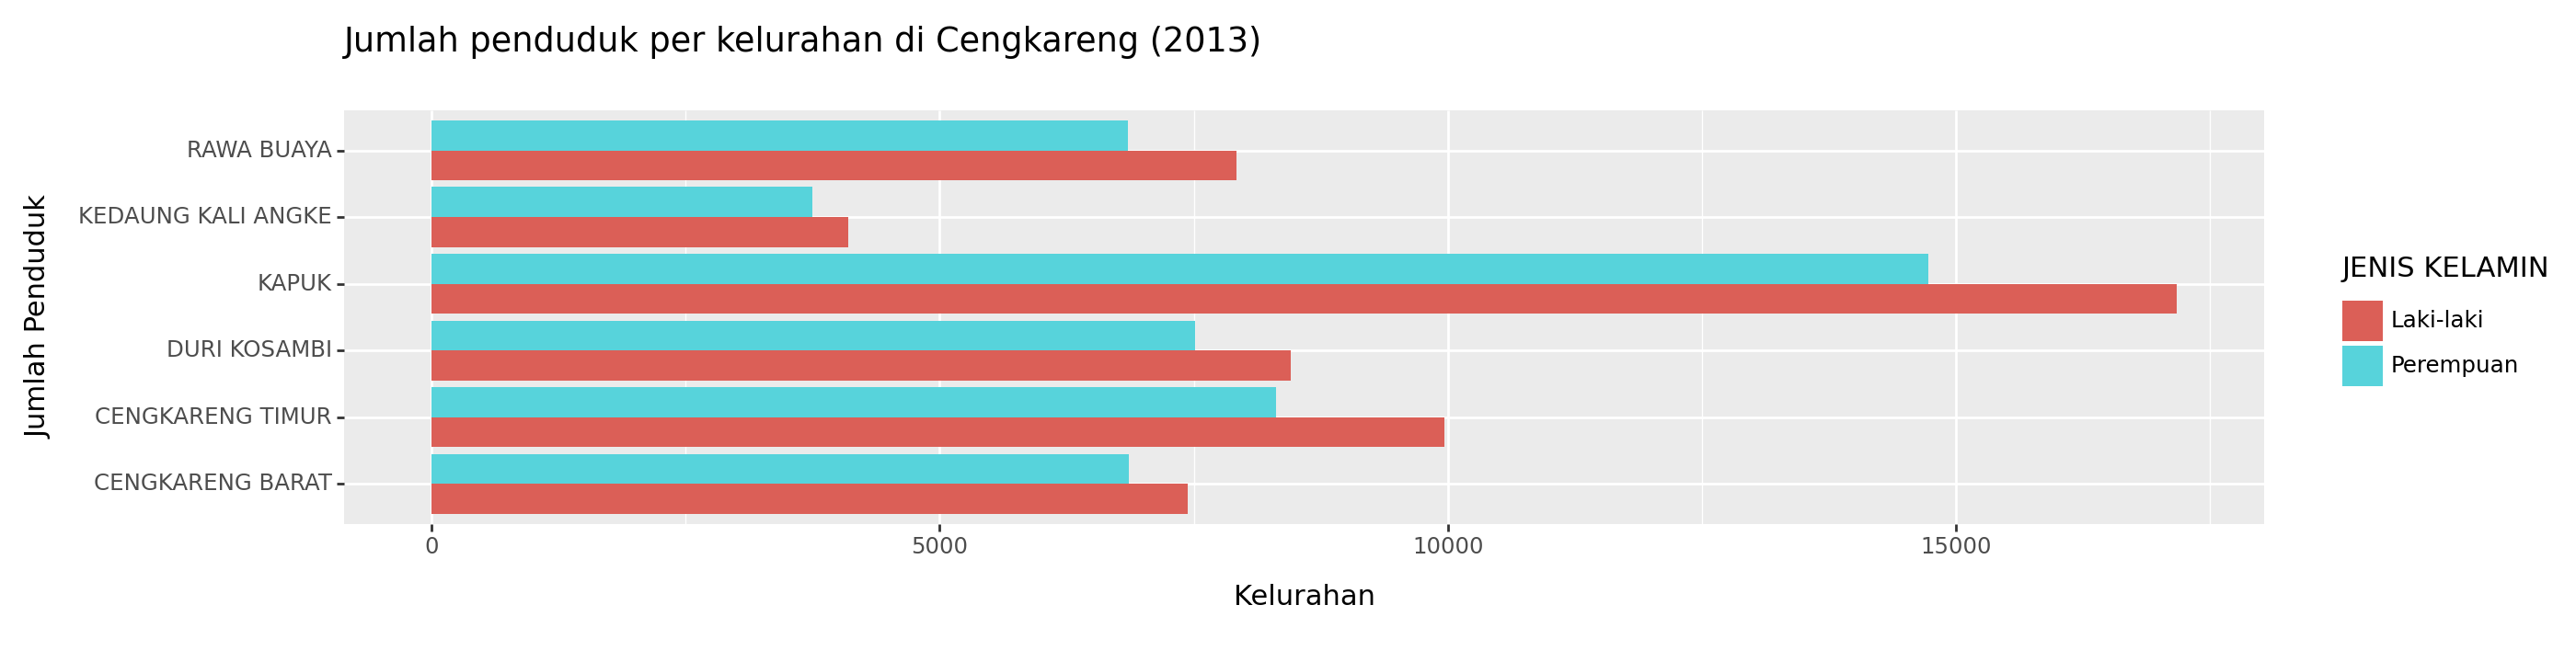

In [28]:
# Memisahkan grafik
plotnine.options.figure_size=(14, 3.6)
(ggplot(data=data[data["NAMA KECAMATAN"]=="CENGKARENG"]) +
       aes(x="NAMA KELURAHAN",y="JUMLAH",fill="JENIS KELAMIN")+
       geom_col(position=position_dodge)+
       coord_flip()+
       labs(title="Jumlah penduduk per kelurahan di Cengkareng (2013)",x="Jumlah Penduduk",y="Kelurahan")).draw()

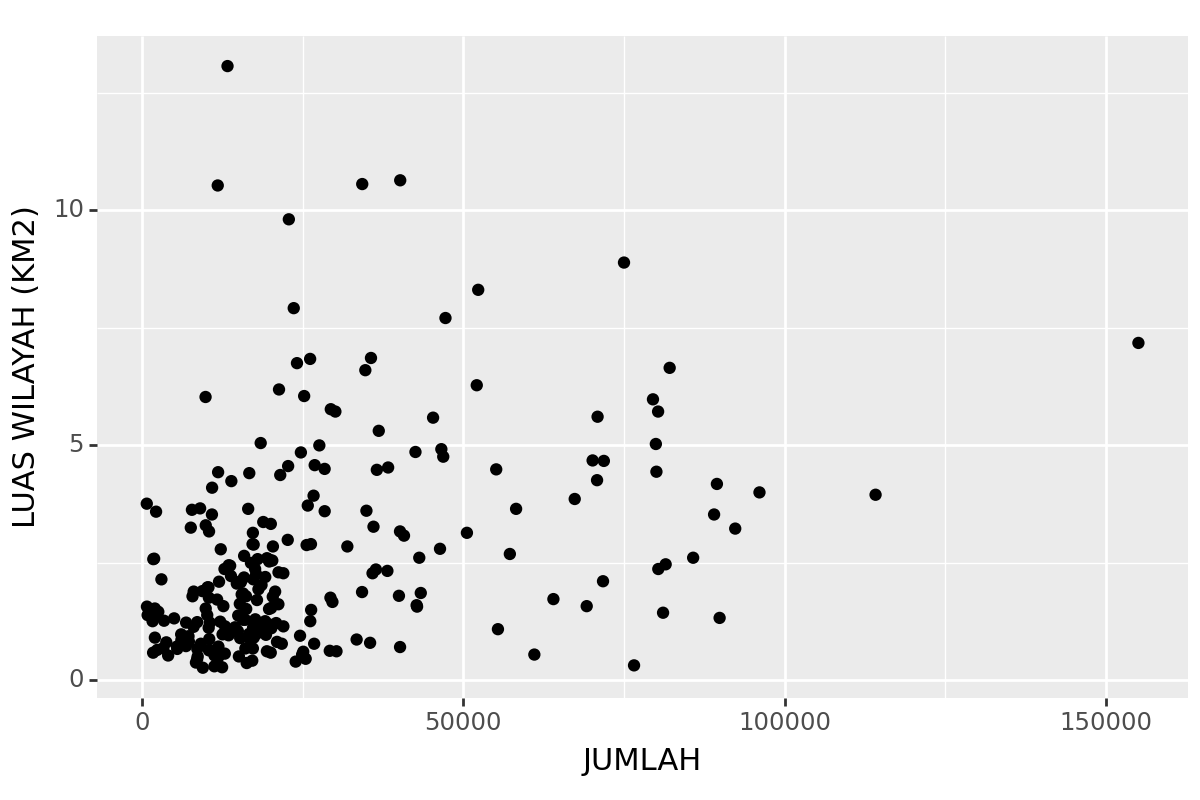

In [39]:
# Membuat scatter plot
plotnine.options.figure_size=(6, 4)
data2 = data.groupby(["NAMA KABUPATEN/KOTA","LUAS WILAYAH (KM2)"])["JUMLAH"].agg('sum').reset_index()
(ggplot(data=data2) + 
 aes(y="LUAS WILAYAH (KM2)",x="JUMLAH")+
geom_point()).draw()

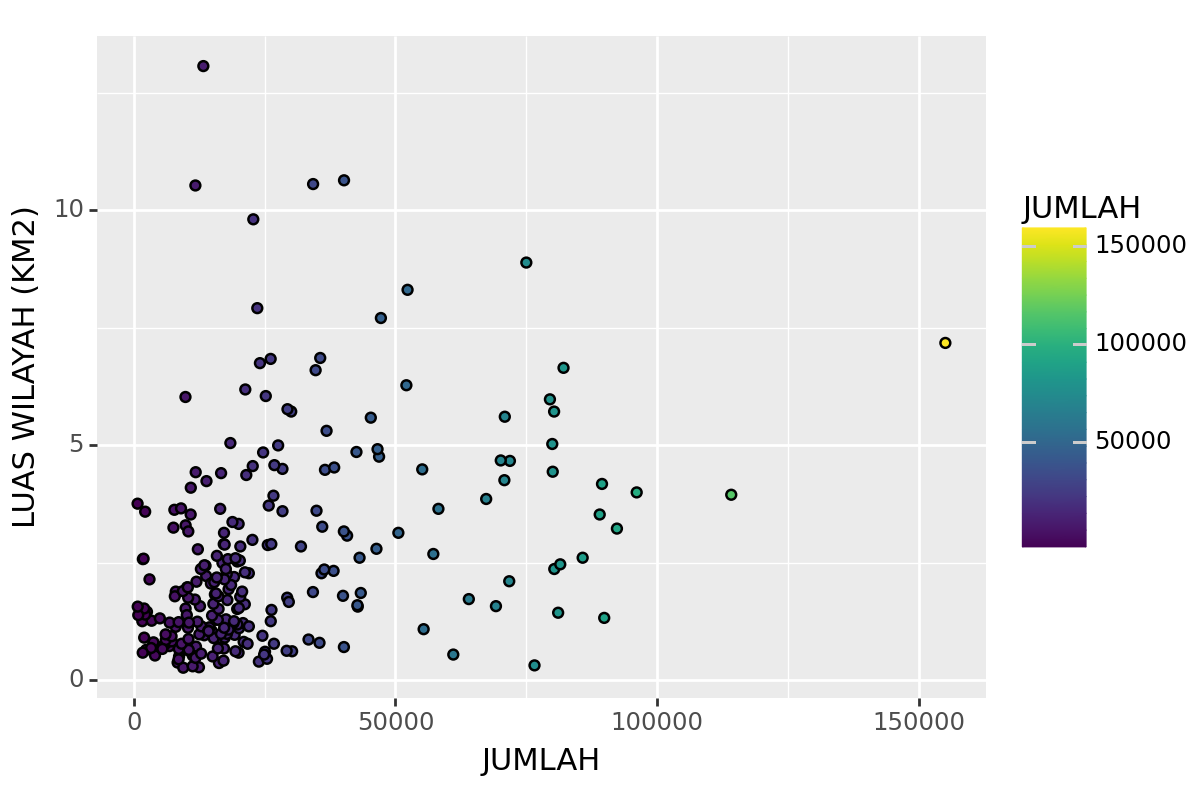

In [40]:
# Memberi Warna pada Scatterplot
plotnine.options.figure_size=(6, 4)
data2 = data.groupby(["NAMA KABUPATEN/KOTA","LUAS WILAYAH (KM2)"])["JUMLAH"].agg('sum').reset_index()
(ggplot(data=data2) + 
 aes(y="LUAS WILAYAH (KM2)",x="JUMLAH",fill="JUMLAH")+
geom_point()).draw()

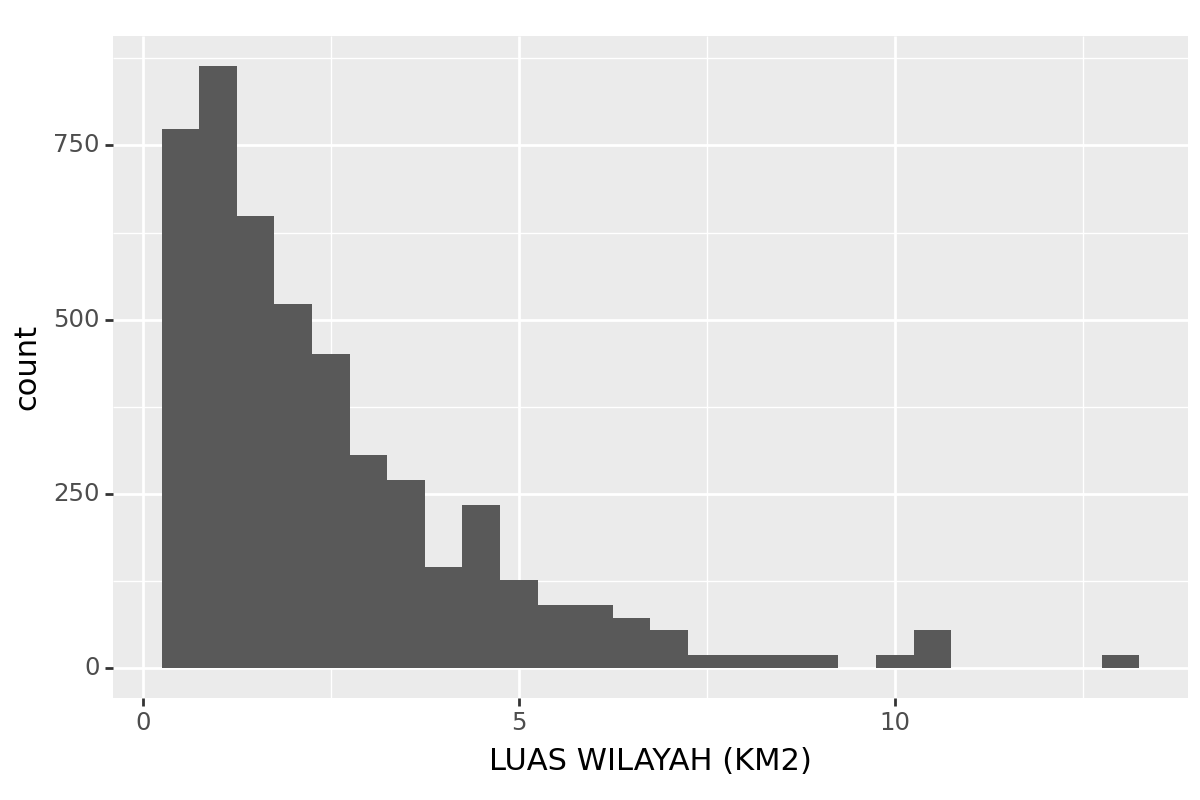

In [61]:
# Membuat Histogram
(ggplot(data=data)+
aes(x="LUAS WILAYAH (KM2)")+
geom_histogram(binwidth=0.5)).draw()

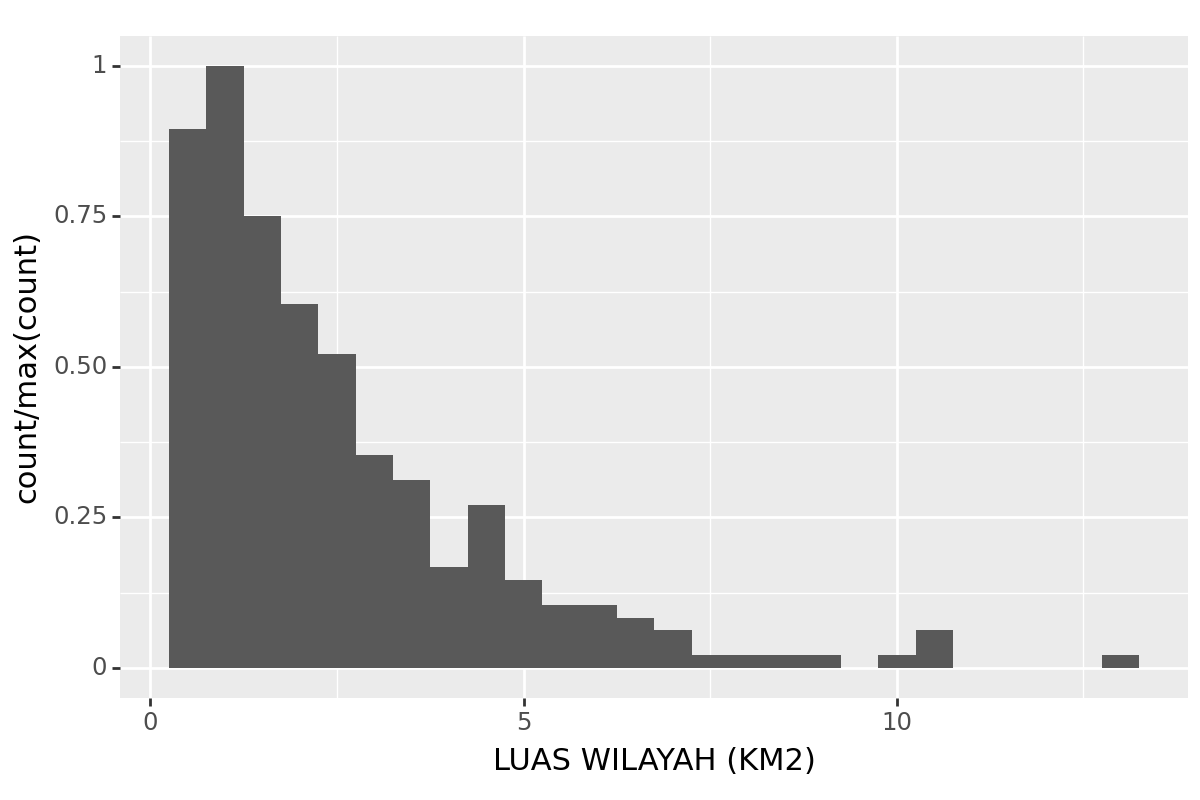

In [63]:
# Mentransformasi sumbu y agar maksimal 1
(ggplot(data=data)+
aes(x="LUAS WILAYAH (KM2)",y='stat(count/max(count))')+
geom_histogram(binwidth=0.5)).draw()

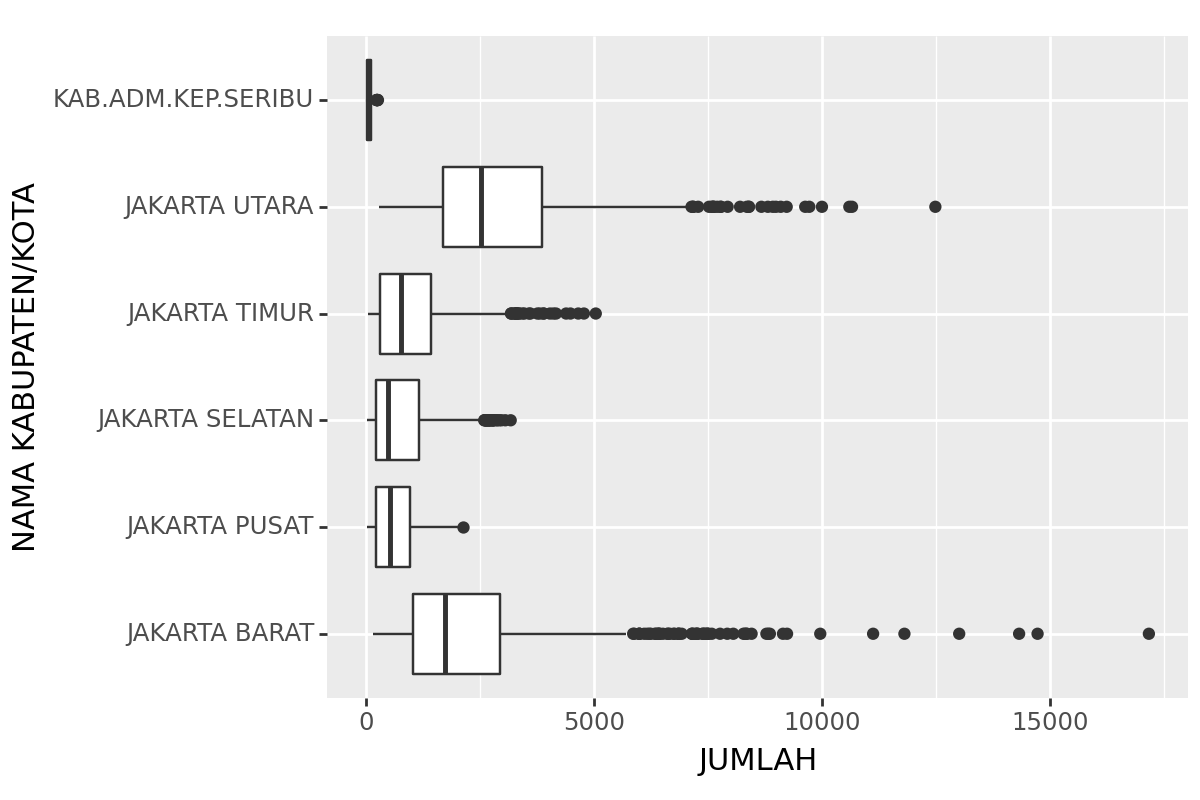

In [67]:
# Menggambarkan boxplot
(ggplot(data=data)+
aes(x="NAMA KABUPATEN/KOTA",y="JUMLAH")+
geom_boxplot()+
coord_flip()).draw()

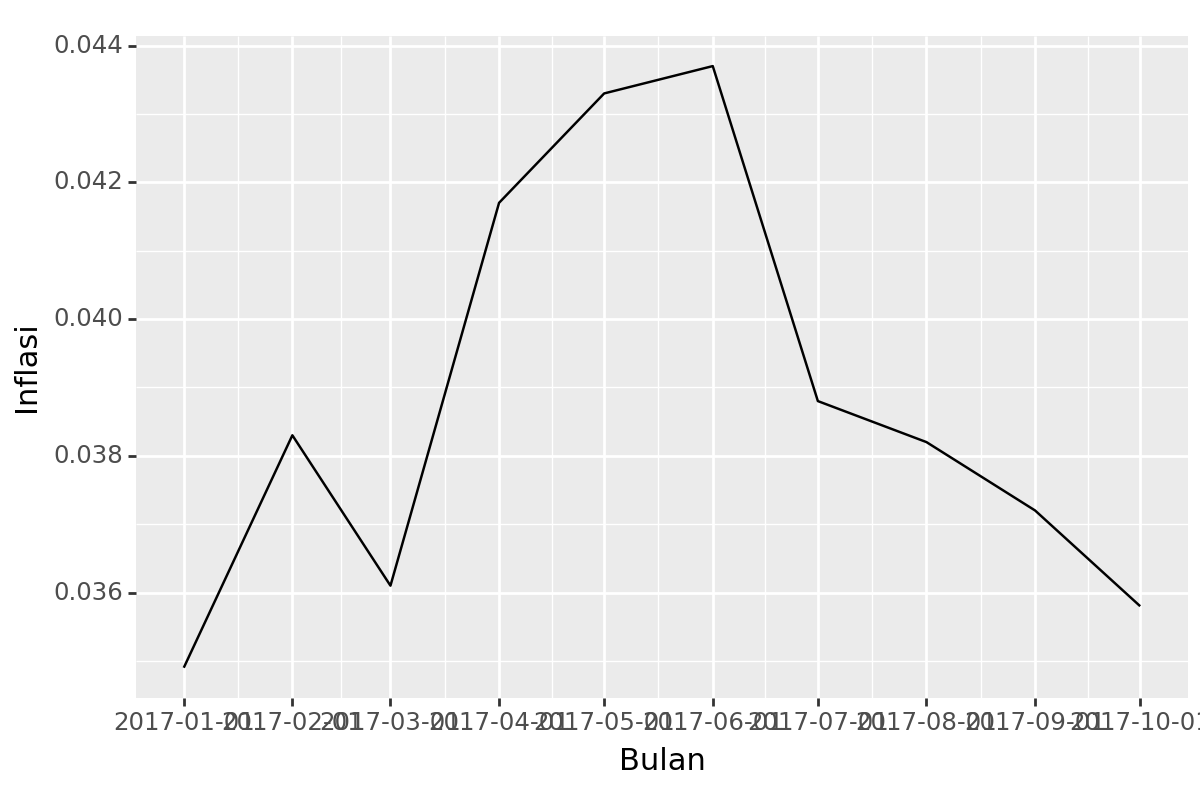

<Figure Size: (600 x 400)>

In [72]:
# Membuat Line Chart
data_2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv")
data_2["Bulan"] = pd.to_datetime(data_2["Bulan"])
(ggplot(data=data_2[data_2["Negara"]=="Indonesia"])+
aes(x="Bulan",y="Inflasi")+
geom_line())

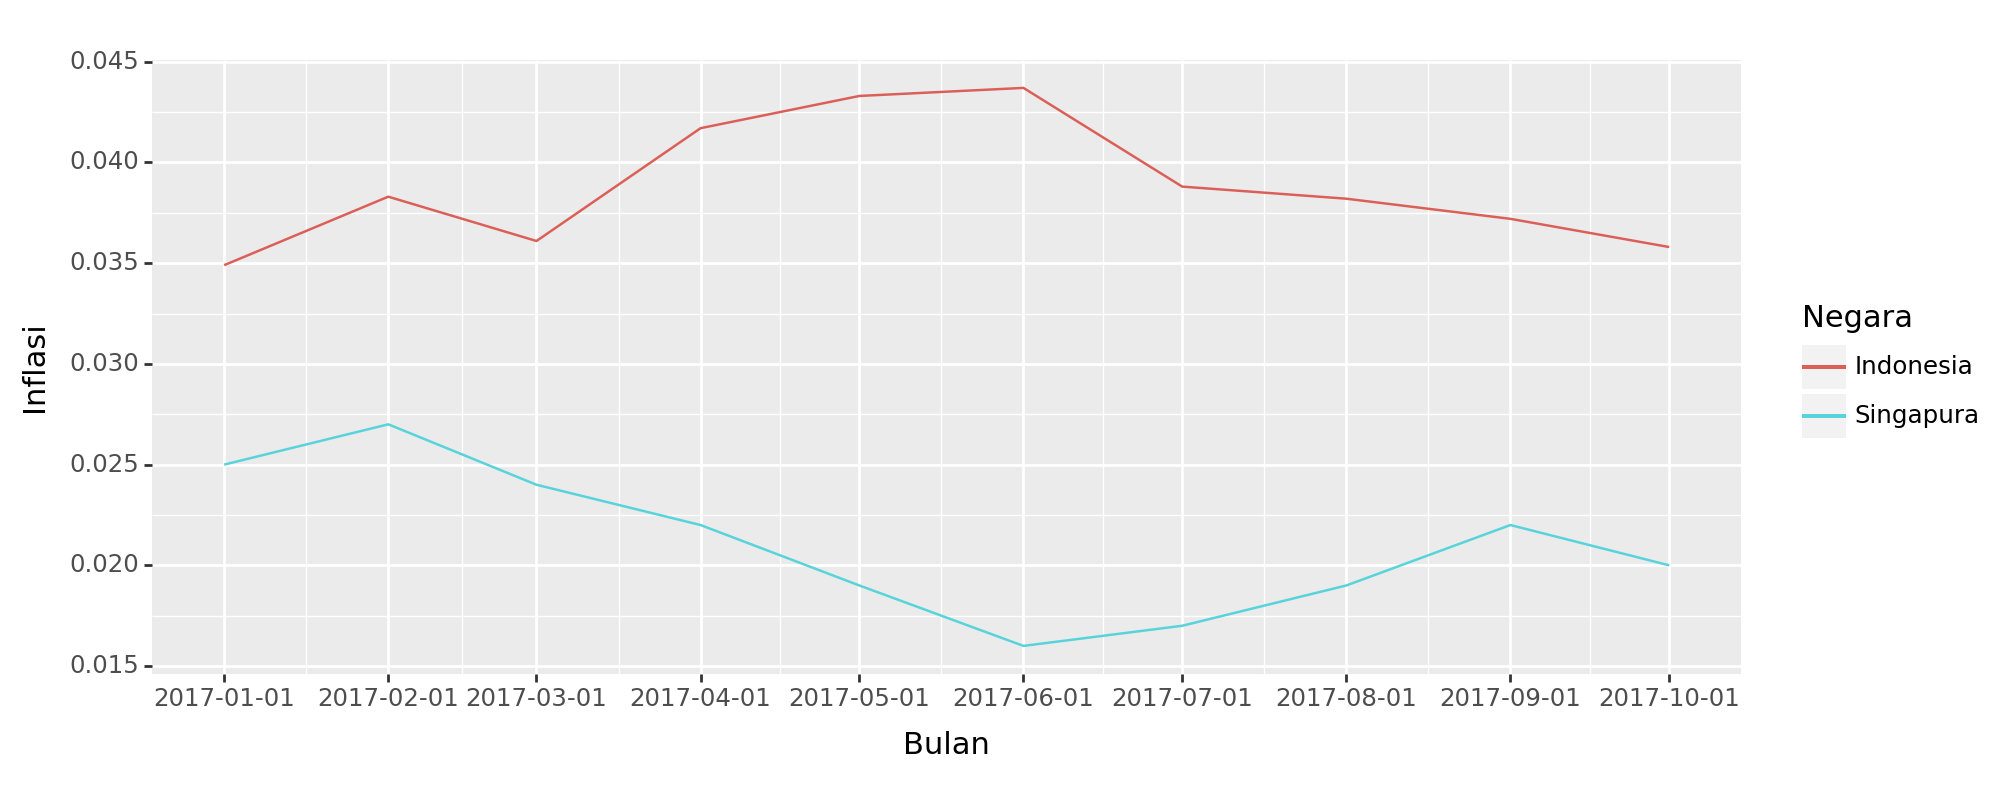

In [76]:
# Membuat dua Line dalam satu Chart
plotnine.options.figure_size=(10, 4)
data_2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv")
data_2["Bulan"] = pd.to_datetime(data_2["Bulan"])
(ggplot(data=data_2)+
aes(x="Bulan",y="Inflasi",color="Negara")+
geom_line()).draw()

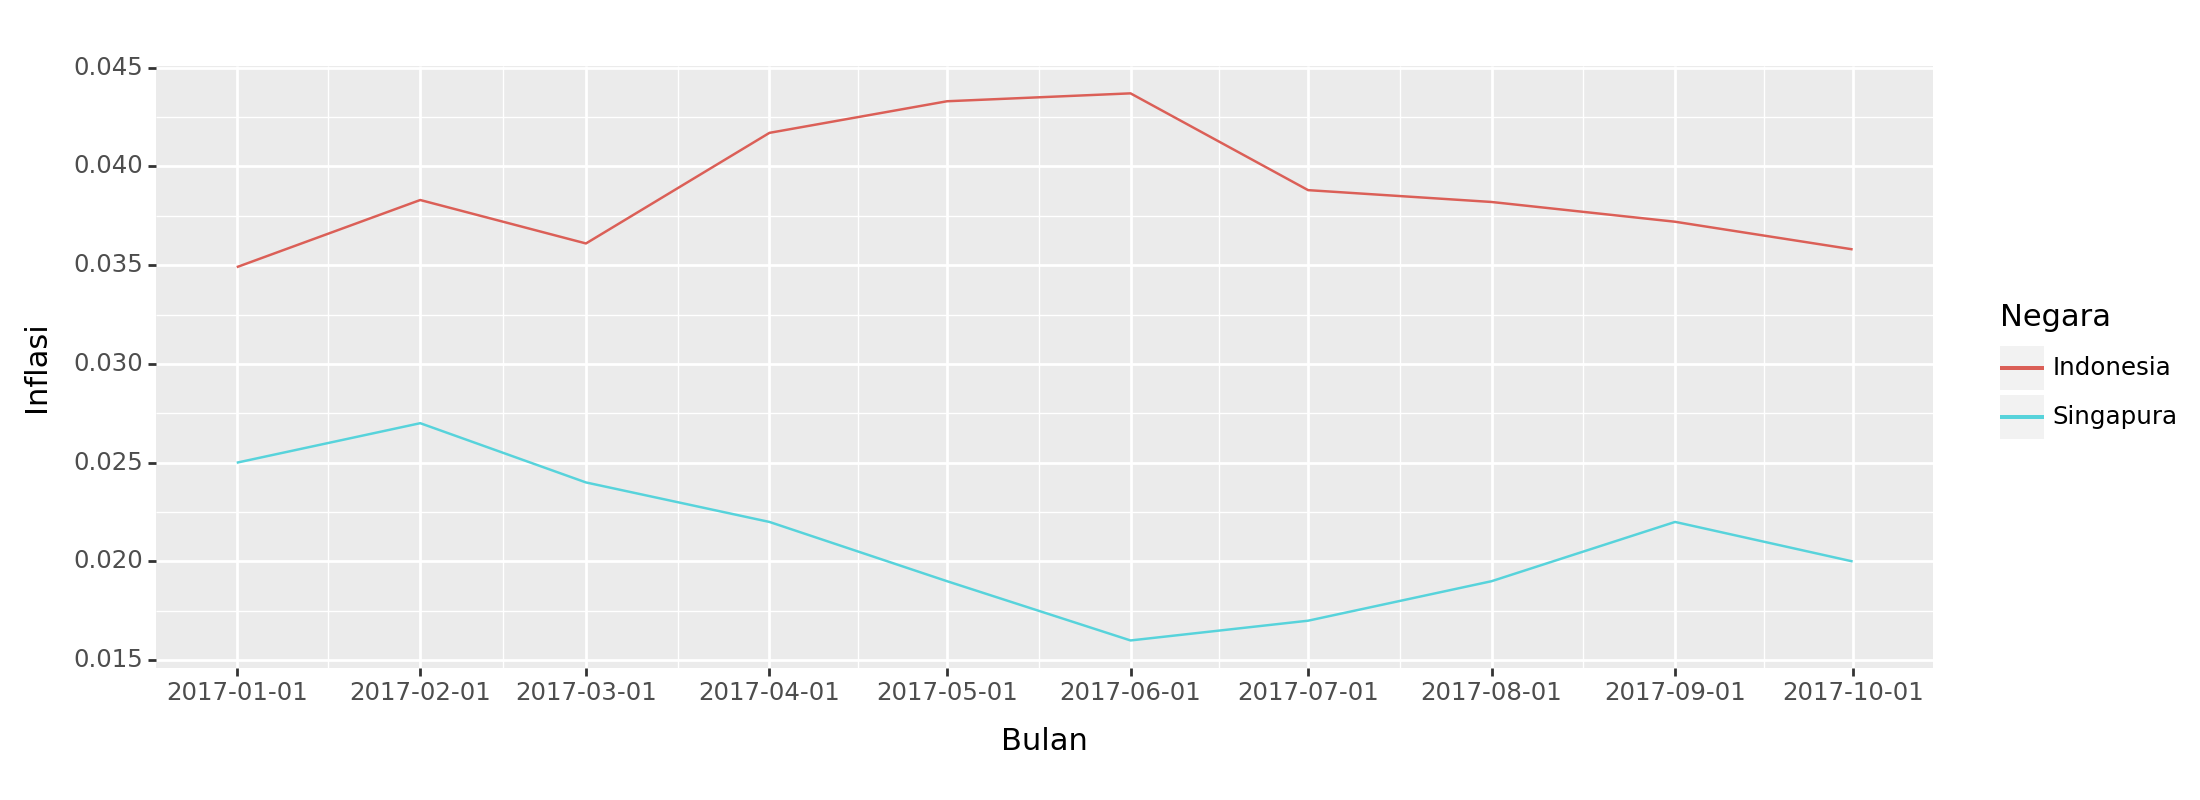

In [78]:
# Membuat Line Chart dengan menambahkan fungsi theme()
plotnine.options.figure_size=(10, 4)
data_2 = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/inflasi.csv")
data_2["Bulan"] = pd.to_datetime(data_2["Bulan"])
(ggplot(data=data_2)+
aes(x="Bulan",y="Inflasi",color="Negara")+
geom_line()+
theme(figure_size=(11,4))).draw()

sumber belajar : www.dqlab.id